In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

In [ ]:
data.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips,[Fresh Tomato Salsa],2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips,[Tomatillo-Green Chili Salsa],2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [ ]:
# 1 Вывести кол-во наблюдений в датасете
print(len(data))

4622


In [ ]:
# 2 Вывести названия столбцов
print(*data.columns, sep='\n')

order_id
quantity
item_name
choice_description
item_price


In [ ]:
# позиции со словом and атомарными не считаем, поэтому вынесем все, что после and, в choice_description

items_with_and = (data['item_name'].str.find(' and ') != -1)
data.loc[items_with_and, ('choice_description')] = data[items_with_and]['item_name'].apply(lambda x: '['+x.split(' and ')[1]+']')
data.loc[items_with_and, ('item_name')] = data[items_with_and]['item_name'].apply(lambda x: x.split(' and ')[0])

In [ ]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips,[Fresh Tomato Salsa],$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips,[Tomatillo-Green Chili Salsa],$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# 3 Определить самую частую позицию в заказе
# Примечание. Для нас важно только информация, встречается позиция в заказе или нет
# То есть если позиция встретилась в 1 заказе 5 раз, это равноценно тому, как если бы она встретилась в заказе хотя бы 1 раз
frequency = data.groupby('item_name')['order_id'].nunique()
print(frequency.sort_values().index[-1])

Chips


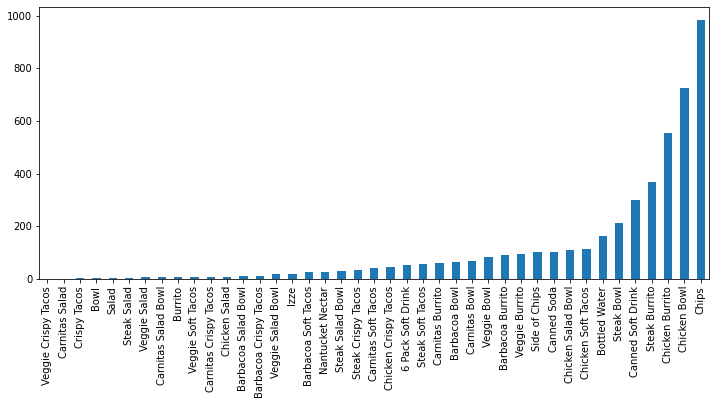

In [ ]:
# 4 Построить гистрограмму частоты заказов по позициям
item_frequency = data['item_name'].value_counts()
item_frequency.sort_values().plot.bar(figsize=(12, 5))

In [ ]:
# 5 Измените тип переменной item_price c с помощью лямбда функции
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))

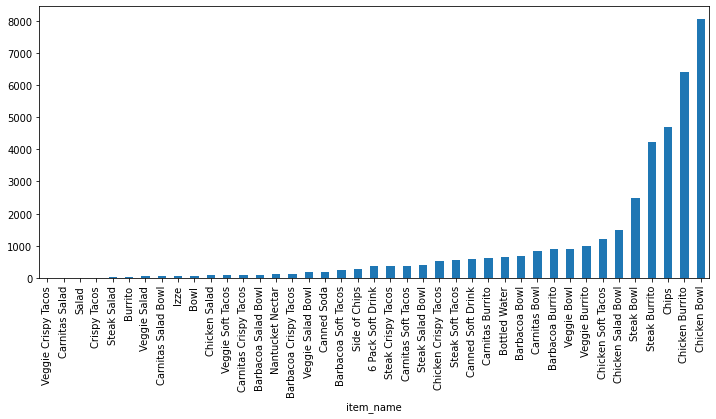

In [ ]:
# 6 Построить гистограмму кол-во денег заработанных по каждой позиции
income = data.groupby('item_name').apply(lambda x: (x['item_price'] * x['quantity']).sum())
income.sort_values().plot.bar(figsize=(12, 5))

In [ ]:
# 7 Средняя сумма заказа
# first variant
orders_number = len(data['order_id'].value_counts())
print((data['item_price'] * data['quantity']).sum() / orders_number)

# second variant
print(data.groupby('order_id').apply(lambda x: (x['quantity'] * x['item_price']).sum()).mean())

21.39423118865867
21.394231188658654


In [ ]:
# 8 Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
orders_data = data.groupby('order_id').size()
print('average:', orders_data.mean())
print('min:', orders_data.min())
print('max:', orders_data.max())
print('mode:', orders_data.mode()[0])

average: 2.520174482006543
min: 1
max: 23
mode: 2


In [ ]:
# 9 Определить статистику заказов стейков, а также статистику заказов соусов
data['total_cost'] = data['quantity']*data['item_price']
steaks = data[data['item_name'].str.startswith('Steak')]

print('steak orders count:', steaks['quantity'].sum())
print('average:', steaks['item_price'].mean())
print('min:', steaks['item_price'].min())
print('max:', steaks['item_price'].max())
print('mode:', steaks['item_price'].mode()[0])
print('std:', steaks['item_price'].std(), '\n')

steaks_with_sauce = steaks[steaks['choice_description'].str.rfind('Salsa') != -1]
mild = steaks_with_sauce[steaks_with_sauce['choice_description'].str.rfind('(Mild)') != -1]
medium = steaks_with_sauce[steaks_with_sauce['choice_description'].str.rfind('(Medium)') != -1]
hot = steaks_with_sauce[steaks_with_sauce['choice_description'].str.rfind('(Hot)') != -1]
default = steaks_with_sauce[steaks_with_sauce['choice_description'].str.rfind('(') == -1]

print('Статистика по числу заказанных стейков с разными соусами:')
print('default sauce:', default['quantity'].sum())
print('mild sauce:', mild['quantity'].sum())
print('medium sauce:', medium['quantity'].sum())
print('hot sauce:', hot['quantity'].sum(), '\n')

orders_data = pd.DataFrame({
    'default': default['quantity'].describe(),
    'mild': mild['quantity'].describe(),
    'medium': medium['quantity'].describe(),
    'hot': hot['quantity'].describe()
})
print('Статистика по стейкам в заказе по типам соусов:', '\n', orders_data, '\n')

price_data = pd.DataFrame({
    'default': default['total_cost'].describe(),
    'mild': mild['total_cost'].describe(),
    'medium': medium['total_cost'].describe(),
    'hot': hot['total_cost'].describe()
})
print('Статистика по цене стейков в заказе по типам соусов:', '\n', price_data, '\n')

steak orders count: 734
average: 10.518888888888851
min: 8.69
max: 27.75
mode: 9.25
std: 2.566743117844186 

Статистика по числу заказанных стейков с разными соусами:
default sauce: 480
mild sauce: 96
medium sauce: 115
hot sauce: 84 

Статистика по стейкам в заказе по типам соусов: 
           default       mild      medium       hot
count  459.000000  94.000000  112.000000  80.00000
mean     1.045752   1.021277    1.026786   1.05000
std      0.229101   0.145079    0.162182   0.21932
min      1.000000   1.000000    1.000000   1.00000
25%      1.000000   1.000000    1.000000   1.00000
50%      1.000000   1.000000    1.000000   1.00000
75%      1.000000   1.000000    1.000000   1.00000
max      3.000000   2.000000    2.000000   2.00000 

Статистика по цене стейков в заказе по типам соусов: 
           default       mild      medium        hot
count  459.000000  94.000000  112.000000  80.000000
mean    11.896296  10.093617   10.134821  10.774250
std      7.651149   3.967983    4.990802   

In [ ]:
# 10 Добавить новый столбец цен на каждую позицию в заказе в рублях
exchange = 72.9
data['item_price_rubles'] = data['item_price'].apply(lambda x: x * exchange)
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,174.231
1,1,1,Izze,[Clementine],3.39,247.131
2,1,1,Nantucket Nectar,[Apple],3.39,247.131
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,174.231
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1237.842


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [4]:
# UMAP, t-SNE, LargeVis, LaplacianEigenmaps (=SpectralEmbedding), PCA on COIL20, MNIST, Fashion-MNIST, GoogleNews
import sys
!{sys.executable} -m pip install cmake==3.17.0
!{sys.executable} -m pip install MulticoreTSNE
!{sys.executable} -m pip install umap-learn

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
from umap import UMAP

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
mnist = pd.read_csv('mnist.csv')
fmnist = pd.read_csv('fmnist.csv')
fmnist = fmnist.rename(columns={'label': 'class'})


In [6]:
from scipy import io
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
coil20 = io.loadmat('COIL20.mat?raw=true')
coil20['class'] = coil20['Y']
coil20.pop('Y', None)

--2022-01-20 08:35:32--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat?raw=true.5’

COIL20.mat?raw=true 100%[===================>]   2.88M  --.-KB/s    in 0.05s   

2022-01-20 08:35:32 (63.8 MB/s) - ‘COIL20.mat?raw=true.5’ saved [3024549/3024549]



array([[ 1],
       [ 1],
       [ 1],
       ...,
       [20],
       [20],
       [20]], dtype=uint8)

In [7]:
from gensim.downloader import load
go_news = load('word2vec-google-news-300').vectors
go_news = go_news[:10000]

In [8]:
go_news = {
    'X': go_news,
    'class': None
}

In [9]:
tsne = TSNE(n_components=2, n_jobs=4)
laplac = SpectralEmbedding(n_components=2)
pca = PCA(n_components=2)
umap = UMAP()

algos = [pca, umap, laplac, tsne]
algos_names = ['PCA', 'UMAP', 'Laplacian Eigenmaps', 'Multicore t-SNE']
datasets = [mnist, fmnist, go_news, coil20]
datasets_names = ['MNIST', 'f-MNIST', 'GOOGLE NEWS', 'COIL_20']

In [22]:
import numpy as np

results = [[None for j in range(len(datasets))] for i in range(len(algos))]
labels = [[None for j in range(len(datasets))] for i in range(len(algos))]

num = 10000
for i, algo in enumerate(algos):
    for j, dataset in enumerate(datasets):
        if isinstance(dataset, pd.DataFrame):
            X = dataset.drop('class', axis=1)[:num]
            y = dataset['class'][:num]
        else:
            X = dataset['X']
            y = dataset['class']
        X_transformed = algo.fit_transform(X)
        results[i][j] = np.copy(X_transformed)
        labels[i][j] = np.copy(y)

In [25]:
for i, _ in enumerate(algos):
    labels[i][2] = np.array([0]*10000)

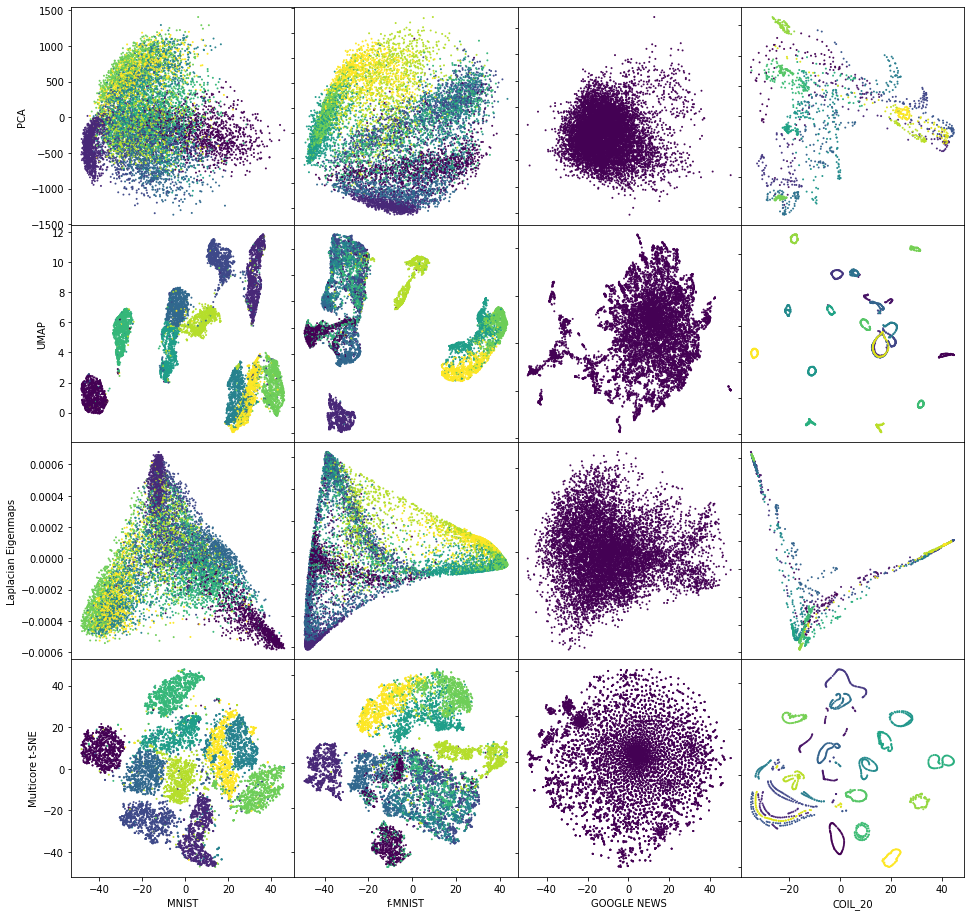

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(len(algos), len(datasets), hspace=0, wspace=0)

for i, row in enumerate(results):
    for j, res in enumerate(row):
        ax = fig.add_subplot(gs[i, j])
        ax.scatter(res[:, 0], res[:, 1], s=1, c=labels[i][j], alpha=0.9)
        ax.set(xlabel=datasets_names[j], ylabel=algos_names[i])
        ax.label_outer()